# Two-layer Neural Network Workbook for CS145 Homework 3

----
<span style="color:red">**PRINT YOUR NAME AND UID HERE!**</span>

NAME: [PUGALIA, GARVIT RAJKUMAR] UID: [504628127]

----


Please follow the notebook linearly to implement a two layer neural network.

Please print out the workbook entirely when completed.

The goal of this workbook is to give you experience with training a two layer neural network.

---

Import libraries and define relative error function, which is used to check results later. 

In [106]:
import random
import numpy as np
from cs145.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Toy example

Before loading CIFAR-10, there will be a toy example to test your implementation of the forward and backward pass.

In [107]:
from lib.neural_net import TwoLayerNet

In [108]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

### Compute forward pass scores

In [109]:
## Implement the forward pass of the neural network.

# Note, there is a statement if y is None: return scores, which is why 
# the following call will calculate the scores.
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
    [-1.07260209,  0.05083871, -0.87253915],
    [-2.02778743, -0.10832494, -1.52641362],
    [-0.74225908,  0.15259725, -0.39578548],
    [-0.38172726,  0.10835902, -0.17328274],
    [-0.64417314, -0.18886813, -0.41106892]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

correct scores:
[[-1.07260209  0.05083871 -0.87253915]
 [-2.02778743 -0.10832494 -1.52641362]
 [-0.74225908  0.15259725 -0.39578548]
 [-0.38172726  0.10835902 -0.17328274]
 [-0.64417314 -0.18886813 -0.41106892]]

Difference between your scores and correct scores:
3.381231204052648e-08


### Forward pass loss

The total loss includes data loss (MSE) and regularization loss, which is,

$$L = L_{data}+L_{reg} = \frac{1}{2N}\sum_{i=1}^{N}\left(\boldsymbol{y}_{\text{pred}}-\boldsymbol{y}_{\text{target}}\right)^2 + \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

More specifically in multi-class situation, if the output of neural nets from one sample is $y_{\text{pred}}=(0.1,0.1,0.8)$ and $y_{\text{target}}=(0,0,1)$ from the given label, then the MSE error will be $Error=(0.1-0)^2+(0.1-0)^2+(0.8-1)^2=0.06$

Implement data loss and regularization loss. In the MSE function, you also need to return the gradients which need to be passed backward. This is similar to batch gradient in linear regression. Test your implementation of loss functions. The Difference should be less than 1e-12.

In [110]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss_MSE = 1.8973332763705641 # check this number

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss_MSE)))

Difference between your loss and correct loss:
0.0


### Backward pass (You do not need to implemented this part)

We have already implemented the backwards pass of the neural network for you.  Run the block of code to check your gradients with the gradient check utilities provided. The results should be automatically correct (tiny relative error).

If there is a gradient error larger than 1e-8, the training for neural networks later will be negatively affected.

In [111]:
from cs145.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('{} max relative error: {}'.format(param_name, rel_error(param_grad_num, grads[param_name])))

W2 max relative error: 6.774278173332322e-11
b2 max relative error: 1.887502392114964e-11
W1 max relative error: 1.7476665046687833e-09
b1 max relative error: 7.382451041178829e-10


### Training the network

Implement neural_net.train() to train the network via stochastic gradient descent, much like the linear regression.

Final training loss:  0.02950555626206818


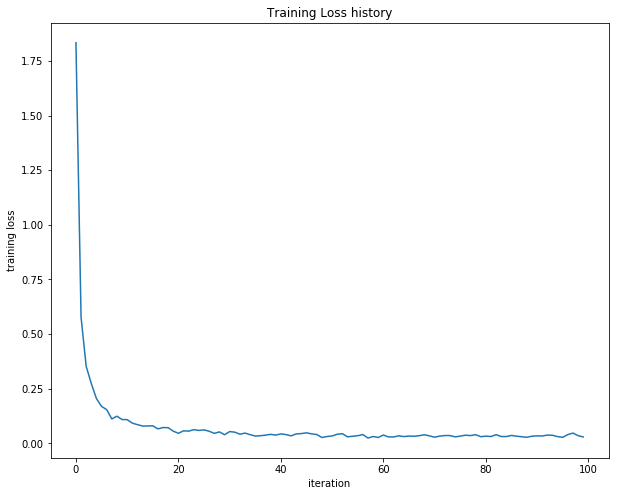

In [112]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Classify CIFAR-10

Do classification on the CIFAR-10 dataset.

In [113]:
from cs145.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = './cs145/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


### Running SGD

If your implementation is correct, you should see a validation accuracy of around 15-18%.

In [114]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

# Save this net as the variable subopt_net for later comparison.
subopt_net = net

iteration 0 / 1000: loss 0.5000623457905099
iteration 100 / 1000: loss 0.49982465294352774
iteration 200 / 1000: loss 0.4995946718475304
iteration 300 / 1000: loss 0.49933536166627984
iteration 400 / 1000: loss 0.4989962372581251
iteration 500 / 1000: loss 0.49847178744773624
iteration 600 / 1000: loss 0.49758927830530253
iteration 700 / 1000: loss 0.4966248113033766
iteration 800 / 1000: loss 0.4958001901438695
iteration 900 / 1000: loss 0.4939583435911163
Validation accuracy:  0.172


In [115]:
stats['train_acc_history']

[0.09, 0.15, 0.225, 0.195, 0.225]

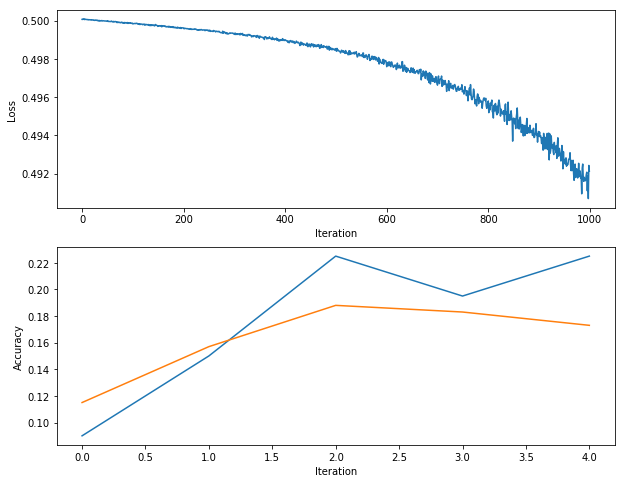

In [116]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')

plt.show()

### Questions:

The training accuracy isn't great. It seems even worse than simple KNN model, which is not as good as expected.

(1) What are some of the reasons why this is the case?  Take the following cell to do some analyses and then report your answers in the cell following the one below.

(2) How should you fix the problems you identified in (1)?

In [117]:
# do analyses to figure out why the accuracy is so low

total_num_data_points = X_train.shape[0]
print("Total number of datapoints: ", total_num_data_points)

class_vals, counts = np.unique(y_train, return_counts=True)
print("Counts for each class in training data: ", counts)

valid_class_vals, valid_counts = np.unique(y_val, return_counts=True)
print("Counts for each class in validation data: ", valid_counts)

Total number of datapoints:  49000
Counts for each class in training data:  [4913 4881 4921 4888 4922 4902 4898 4893 4887 4895]
Counts for each class in validation data:  [ 87 119  79 112  78  98 102 107 113 105]


### Answers:

(1) There are a few reasons for low validation accuracy in neural networks.

    (a) Not enough datapoints: There are 49000 datapoints in the training set. This might not be enough for the complexity of the neural network. In these cases, simpler models such as KNN can do better.

    (b) Imbalance in classes: As seen in the analyses above, the distribution of classes is fair. Therefore, there is no balancing issue in the network.

    (c) Hyperparameters: This is the major issue with the neural net. The hyperparameters (such as learning rate, decay, batch size etc.) are not optimal for the training dataset. For example, the learning rate = 1e-5 is too low, so the network is highly sensitive to noise in the dataset. In Stochastic Gradient Descent, not enough movement is being made every iteration, which can be seen in the Loss vs Iteration graph.

(2) There are many ways to solve the identified problems:

    (a) There is not any guaranteed solution for lack of data. The only possibility is expanding data through simulation or by collecting more manually.
    
    (b) No issue
    
    (c) The hyperparameters need to be optimized by trial and error. The learning rate needs to be increased so that every iteration of SGD, there is more movement towards the optimal minima.

---

## Optimize the neural network

Use the following part of the Jupyter notebook to optimize your hyperparameters on the validation set.  Store your nets as best_net.

In [63]:
best_net = None # store the best model into this 

# ================================================================ #
# YOUR CODE HERE:
#   Optimize over your hyperparameters to arrive at the best neural
#   network.  You should be able to get over 45% validation accuracy.
#   For this part of the notebook, we will give credit based on the
#   accuracy you get.  Your score on this question will be multiplied by:
#      min(floor((X - 23%)) / %22, 1) 
#   where if you get 50% or higher validation accuracy, you get full
#   points.
#
#   Note, you need to use the same network structure (keep hidden_size = 50)!
# ================================================================ #

# todo: optimal parameter search (you can use grid search by for-loops )

input_size = 32 * 32 * 3 # do not change
hidden_size = 50 # do not change
num_classes = 10 # do not change
best_valacc = 0 # do not change

net = TwoLayerNet(input_size, hidden_size, num_classes)

best_lr = 0
best_iter = 0
best_decay = 0

# Train the network and find best parameter by looping through multiple options
# (This code was run multiple times before, so the parameters are in a small but effective range)
for iters in range(800, 1200, 100):
    for lr in range(90, 120, 10):
        for decay in range(85, 95, 3):
            stats = net.train(X_train, y_train, X_val, y_val,
                              num_iters=iters, batch_size=200,
                              learning_rate=(lr/100000),
                              learning_rate_decay=(decay/100),
                              reg=0.1, verbose=False)
            val_acc = (net.predict(X_val) == y_val).mean()
            if val_acc > best_valacc:
                best_lr = lr
                best_decay = decay
                best_iter = iters
                best_valacc = val_acc
                best_net = net

# Output your results
print("== Best parameter settings ==")
# print your best parameter setting here!
print("Number of iterations: ", best_iter)
print("Batch size: 200")
print("Learning rate: ", best_lr / 100000)
print("Learning rate decay: ", best_decay / 100)
print("Regularization: 0.1")
print("Best accuracy on validation set: {}".format(best_valacc))
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #

== Best parameter settings ==
Number of iterations:  1100
Batch size: 200
Learning rate:  0.0009
Learning rate decay:  0.94
Regularization: 0.1
Best accuracy on validation set: 0.522


### Quesions

(1) What is your best parameter settings? (Output from the previous cell)

(2) What parameters did you tune? How are they changing the performance of nerural network? You can discuss any observations from the optimization.

### Answers

(1) The best parameter settings are the following:

num_iters: 1100
batch_size: 200
learning_rate: 0.0009
learning_rate_decay: 0.94
reg: 0.1

(2) While there were many parameters to choose from, I used the following:

    (a) learning_rate: This was the most important parameter. As identified earlier, the learning rate was too low and not enough movement was being made during an iteration of Stochastic Gradient Descent. It was observed that increasing the learning_rate led to better validation accuracies. This value started declining again around 0.001, therefore, values from 0.0009 to 0.0012 were tested for the best parameters.
    
    (b) num_iters: The number of iterations is also an important parameter as it decides when to stop the Stochastic Gradient Descent algorithm. A value of 1000 was noticed to be almost perfect, therefore, values nearby were tested. A larger number of iterations were used since a low value can mean the algorithm finishes before reaching the correct minima.
    
    (c) learning_rate_decay: This hyperparameter decides on the decrease in step size as the SGD algorithm progresses. It was observed that reducing the learning_rate_decay was slightly beneficial, as it maybe allowed the SGD algorithm to take bigger steps to reach the optimum minima.

---

## Visualize the weights of your neural networks

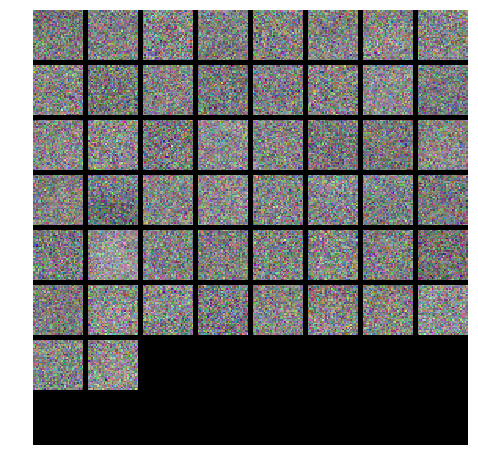

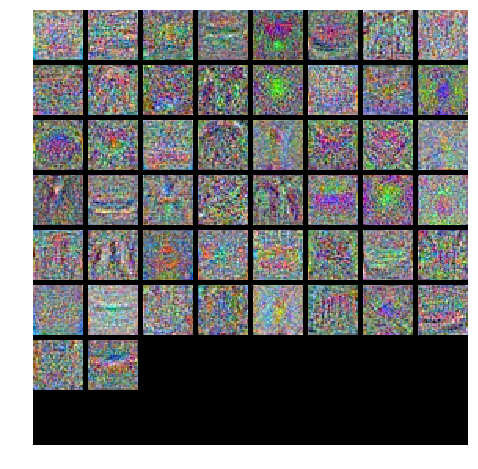

In [118]:
from cs145.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.T.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(subopt_net)
show_net_weights(best_net)

### Questions:

What differences do you see in the weights between the suboptimal net and the best net you arrived at? What do the weights in neural networks probably learn after training?

### Answer:
It is clear from the above visualizations that the weights in best net have more detail than the weights in supobt net. For the subopt net, the weights are monochromatic and indistinguishible. However, in the best net, each weight has a clear symbol/feature that is focused on. The higher clarity in the visualization corresponds to a more learned weight. Throughout the training process, the weights learn the relative importance of different features and aim to identify the best features for the most accurate classification.

In conclusion, by increasing learning rate and number of iterations, the weights have been given more time to pinpoint important features, which is highlighted in the above visualizations.

---

## Evaluate on test set 

In [119]:
test_acc = (best_net.predict(X_test) == y_test).mean()
#test_acc = (subopt_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.479


### Questions:
(1) What is your test accuracy by using the best NN you have got? How much does the performance increase compared with kNN? Why can neural networks perform better than kNN?

(2) Do you have any other ideas or suggestions to further improve the performance of neural networks other than the parameters you have tried in the homework? 

### Answers:

(1) The test accuracy for the best NN is 0.479. Comparing to the KNN accuracy of 0.282, there is a performance increase of around 69%. The neural network is able to identify the importance of features and doesn't completely rely on the structure of the data (unlike KNN). Therefore, for certain datasets where the structure of the data might not be best suited for classification, the neural net approach can identify more minute details in the training set.

(2) There are other ways to improve the performance of the neural net. For example, by simulating and creating more training data, the neural net can be trained with more information and can become more robust. Also, instead of solely relying on stochastic gradient descent, other algorithms can be used to reach an optimum. Lastly, the structure of the neural net was never touched in the homework. It is possible that the introduction of a new layer (or removal of one) can benefit the performance.

---

## Bonus Question: Change MSE Loss to Cross Entropy Loss

This is a bonus question. If you finish this (cross entropy loss) correctly, you will get **up to 20 points** (add up to your HW3 score). 

Note: From grading policy of this course, your maximum points from homework are still 25 out of 100, but you can use the bonus question to make up other deduction of other assignments.

Pass output scores in networks from forward pass into softmax function. The softmax function is defined as,
$$p_j = \sigma(z_j) = \frac{e^{z_j}}{\sum_{c=1}^{C} e^{z_c}}$$
After softmax, the scores can be considered as probability of $j$-th class.

The cross entropy loss is defined as,
$$L = L_{\text{CE}}+L_{reg} = \frac{1}{N}\sum_{i=1}^{N} \log \left(p_{i,j}\right)+ \frac{\lambda}{2} \left(||W_1||^2 + ||W_2||^2 \right)$$

To take derivative of this loss, you will get the gradient as,
$$\frac{\partial L_{\text{CE}}}{\partial o_i} = p_i - y_i $$

More details about multi-class cross entropy loss, please check [http://cs231n.github.io/linear-classify/](http://cs231n.github.io/linear-classify/) and [more explanation](https://deepnotes.io/softmax-crossentropy) about the derivative of cross entropy.

Change the loss from MSE to cross entropy, you only need to change you ```MSE_loss(x,y)``` in ```TwoLayerNet.loss()``` function to ```softmax_loss(x,y)```.

**Now you are free to use any code to show your results of the two-layer networks with newly-implemented cross entropy loss. You can use code from previous cells.**

In [ ]:
# Start training your networks and show your results

In [104]:
softmax_loss, _ = net.loss(X, y, reg=0.05)
MSE_loss = 1.8973332763705641

print("MSE: ", MSE_loss)
print("Softmax: ", softmax_loss)

MSE:  1.8973332763705641
Softmax:  3.6604469087734133


In [105]:
# Using SOFTMAX LOSS and GRADIENT instead of MSE LOSS and GRADIENT
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-5, learning_rate_decay=0.95,
            reg=0.1, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

iteration 0 / 1000: loss 23.025927763270573
iteration 100 / 1000: loss 29.999716307795367
iteration 200 / 1000: loss 31.5098061452444
iteration 300 / 1000: loss 33.08374321360586
iteration 400 / 1000: loss 33.36263286959614
iteration 500 / 1000: loss 34.80345318781104
iteration 600 / 1000: loss 37.26909147298578
iteration 700 / 1000: loss 37.60187720265645
iteration 800 / 1000: loss 38.24647024019616
iteration 900 / 1000: loss 38.62390281555874
Validation accuracy:  0.465


In [ ]:
# The validation accuracy is similar to MSE, however, the loss is much higher. This might be an error in code.